## Importing Libraries


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['font.size'] = 15
plt.rcParams['figure.facecolor']= '#FFE5B4'

## Reading the dataset

In [5]:
df = pd.read_csv(r"D:\healthy_life_expectancy_project\world-happiness-report-2021.csv")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# data processing

In [6]:
df = df[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [7]:
df.head(1)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186


In [8]:
df.rename(columns={'Ladder score':'happiness_score','Country name':'country_name','Logged GDP per capita':'logged_gdp_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'},inplace=True)

In [9]:
df.rename(columns={'logged_gdp_per_capita':'gdp_per_capita'},inplace=True)

In [10]:
df.rename(columns={'Regional indicator':'regional_indicator'},inplace=True)

In [11]:
df.head(2)

,country_name,regional_indicator,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179


In [12]:
df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [13]:
df.describe().round()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,149.0,149.0,149.0,149.0,149.0,149.0,149.0
mean,6.0,9.0,1.0,65.0,1.0,-0.0,1.0
std,1.0,1.0,0.0,7.0,0.0,0.0,0.0
min,3.0,7.0,0.0,48.0,0.0,-0.0,0.0
25%,5.0,9.0,1.0,60.0,1.0,-0.0,1.0
50%,6.0,10.0,1.0,67.0,1.0,-0.0,1.0
75%,6.0,10.0,1.0,70.0,1.0,0.0,1.0
max,8.0,12.0,1.0,77.0,1.0,1.0,1.0


# Exploratory Data Analysis (EDA)

In [14]:
df_corr = df.corr().round(1)
df_corr

C:\Users\BG\AppData\Local\Temp\ipykernel_3952\4096933211.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().round(1)


,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.0,0.8,0.8,0.8,0.6,-0.0,-0.4
gdp_per_capita,0.8,1.0,0.8,0.9,0.4,-0.2,-0.3
social_support,0.8,0.8,1.0,0.7,0.5,-0.1,-0.2
healthy_life_expectancy,0.8,0.9,0.7,1.0,0.5,-0.2,-0.4
freedom_to_make_life_choices,0.6,0.4,0.5,0.5,1.0,0.2,-0.4
generosity,-0.0,-0.2,-0.1,-0.2,0.2,1.0,-0.2
perceptions_of_corruption,-0.4,-0.3,-0.2,-0.4,-0.4,-0.2,1.0


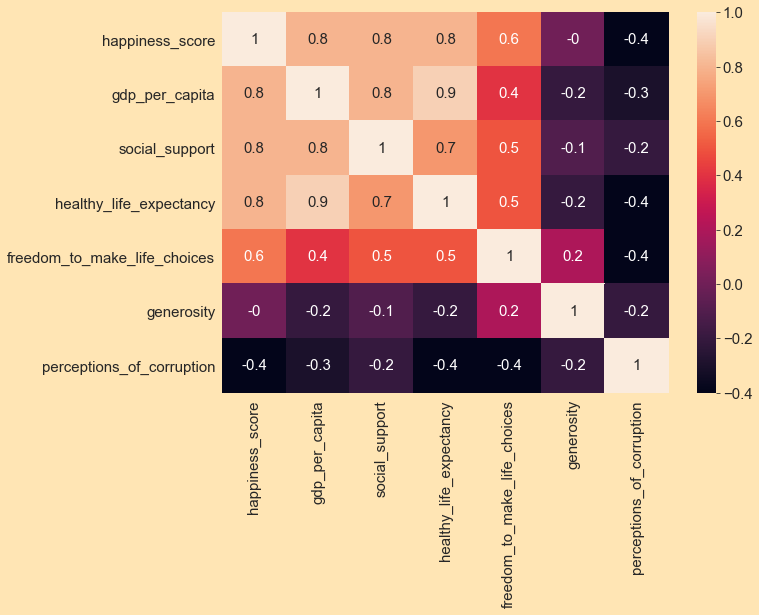

In [28]:
sns.heatmap(df_corr,annot=True);

## observation-
### we see a high positive correlation between happiness_score and gdp_per_capita,social_support.
### we see a negative corr between happiness_score and generosity,perceptions_of_corruption

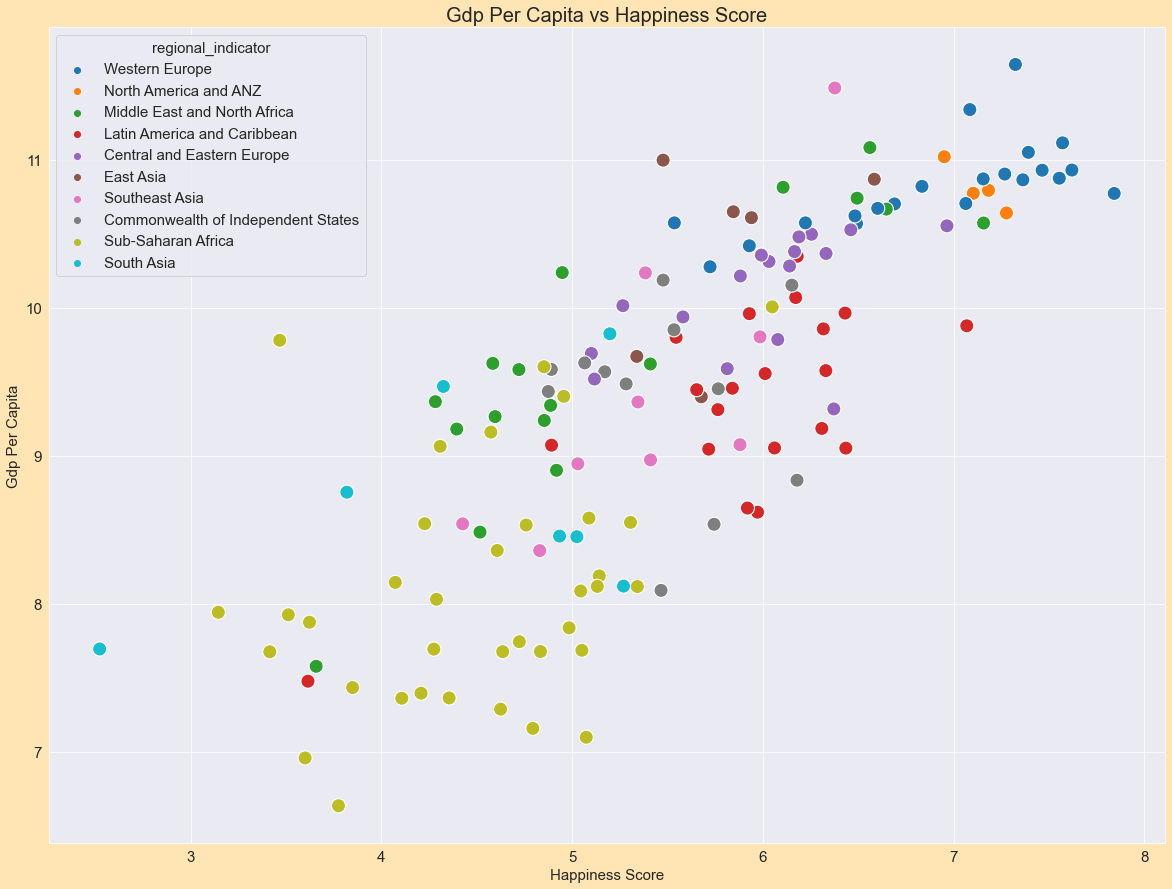

In [42]:
plt.rcParams['figure.figsize'] = (20,15)
plt.title('Gdp Per Capita vs Happiness Score',fontsize=20)
plt.legend(df['regional_indicator'],loc='upper left',fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('Gdp Per Capita')
sns.scatterplot(x=df['happiness_score'],y=df['gdp_per_capita'],hue = df['regional_indicator'],s=200);

## observation-
### clearly western europe,north america have the highest gdp per capita and happiness score
### sub-saharan africa and south asia have the least gdp per capita and happiness score

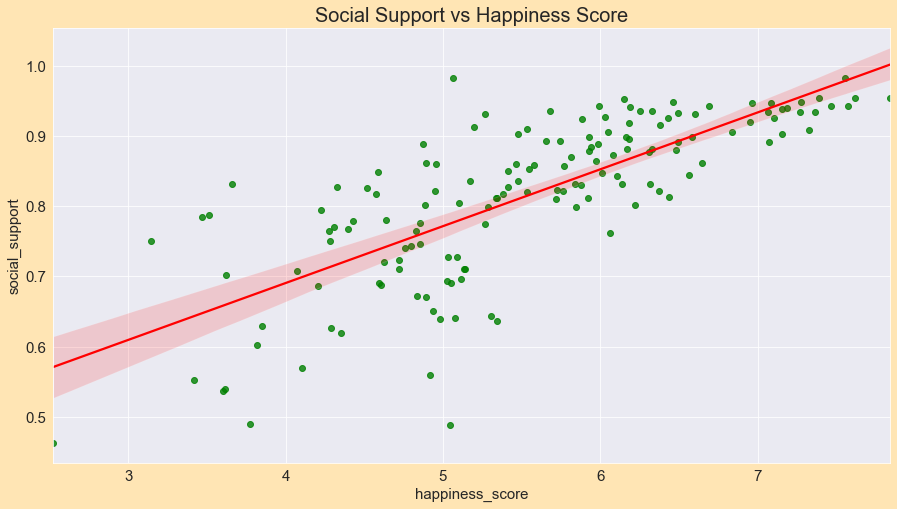

In [44]:
plt.title('Social Support vs Happiness Score',fontsize=20)
plt.rcParams['figure.figsize'] = (15,8)
sns.regplot(x=df['happiness_score'],y=df['social_support'],line_kws ={'color':'Red'},color='green');

In [45]:
df.head()

,country_name,regional_indicator,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [48]:
gdp_region = df.groupby('regional_indicator')['gdp_per_capita'].sum().reset_index().sort_values(by='gdp_per_capita',ascending=False).head(10)
gdp_region

,regional_indicator,gdp_per_capita
8,Sub-Saharan Africa,290.707
9,Western Europe,227.277
3,Latin America and Caribbean,187.400
0,Central and Eastern Europe,171.854
4,Middle East and North Africa,164.324
1,Commonwealth of Independent States,112.822
7,Southeast Asia,84.793
2,East Asia,62.206
6,South Asia,60.778
5,North America and ANZ,43.238


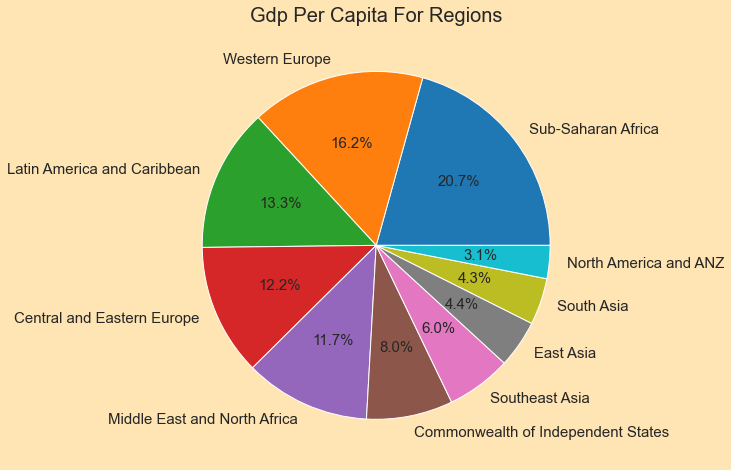

In [58]:
labels = gdp_region['regional_indicator']
plt.pie(gdp_region['gdp_per_capita'],labels=labels,autopct='%1.1f%%')
plt.title('Gdp Per Capita For Regions',fontsize=20)
plt.show()

## observation-
### we see Sub-Saharan Africa is high up for gdp per capita for 21%, then western europe for 17%
### we see north america and Anz is down there for gdp per capita with just 3%

In [60]:
total_countries = df.groupby('regional_indicator')['country_name'].count()
total_countries

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

In [64]:
corruption_per_region = df.groupby('regional_indicator')['perceptions_of_corruption'].mean().reset_index().sort_values(by='perceptions_of_corruption',ascending=False)
corruption_per_region

,regional_indicator,perceptions_of_corruption
0,Central and Eastern Europe,0.850529
6,South Asia,0.797429
3,Latin America and Caribbean,0.792600
8,Sub-Saharan Africa,0.765944
4,Middle East and North Africa,0.762235
1,Commonwealth of Independent States,0.725083
7,Southeast Asia,0.709111
2,East Asia,0.683333
9,Western Europe,0.523095
5,North America and ANZ,0.449250


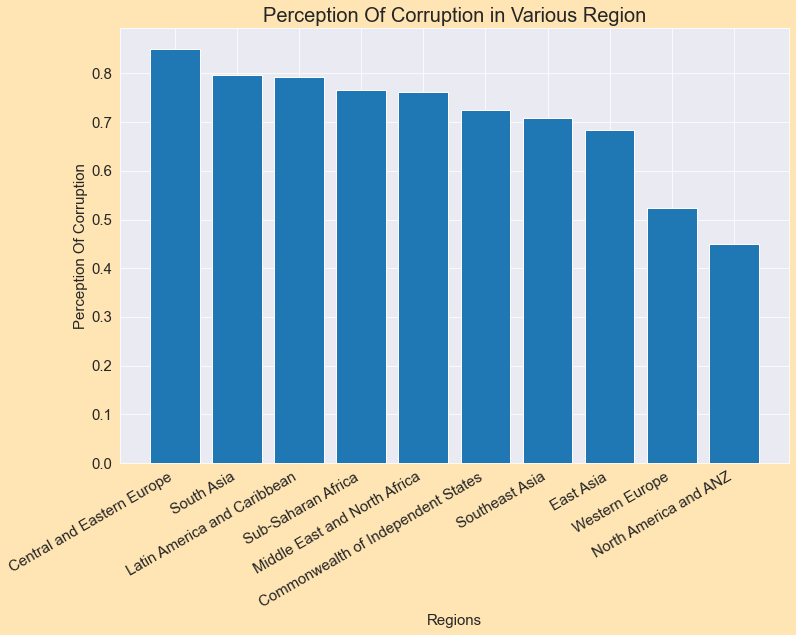

In [66]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Perception Of Corruption in Various Region',fontsize=20)
plt.xlabel('Regions')
plt.ylabel('Perception Of Corruption')
plt.xticks(rotation=30,ha='right')
plt.bar(corruption_per_region['regional_indicator'],corruption_per_region['perceptions_of_corruption']);

## observation-
### central and eastern europe has the highest avg perceptions of curroption with 0.86
### western europe	and North America and ANZ has the least avg perceptions of curroption with	0.53, 0.54

In [67]:
df.head()

,country_name,regional_indicator,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [23]:
top10_life_expectancy = df.groupby('country_name')['healthy_life_expectancy'].mean().reset_index().sort_values(by='healthy_life_expectancy',ascending=False).head(10)
top10_life_expectancy

,country_name,healthy_life_expectancy
119,Singapore,76.953
52,Hong Kong S.A.R. of China,76.820
64,Japan,75.100
124,Spain,74.700
128,Switzerland,74.400
41,France,74.000
123,South Korea,73.900
5,Australia,73.900
31,Cyprus,73.898
101,North Cyprus,73.898


In [25]:
bottom10_life_expectancy = df.groupby('country_name')['healthy_life_expectancy'].mean().reset_index().sort_values(by='healthy_life_expectancy',ascending=False).tail(10)
bottom10_life_expectancy

,country_name,healthy_life_expectancy
21,Cameroon,53.515
19,Burundi,53.400
0,Afghanistan,52.493
83,Mali,51.969
118,Sierra Leone,51.651
126,Swaziland,50.833
62,Ivory Coast,50.114
100,Nigeria,50.102
74,Lesotho,48.700
23,Chad,48.478


C:\Users\BG\AppData\Local\Temp\ipykernel_3952\4031433479.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\BG\AppData\Local\Temp\ipykernel_3952\4031433479.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


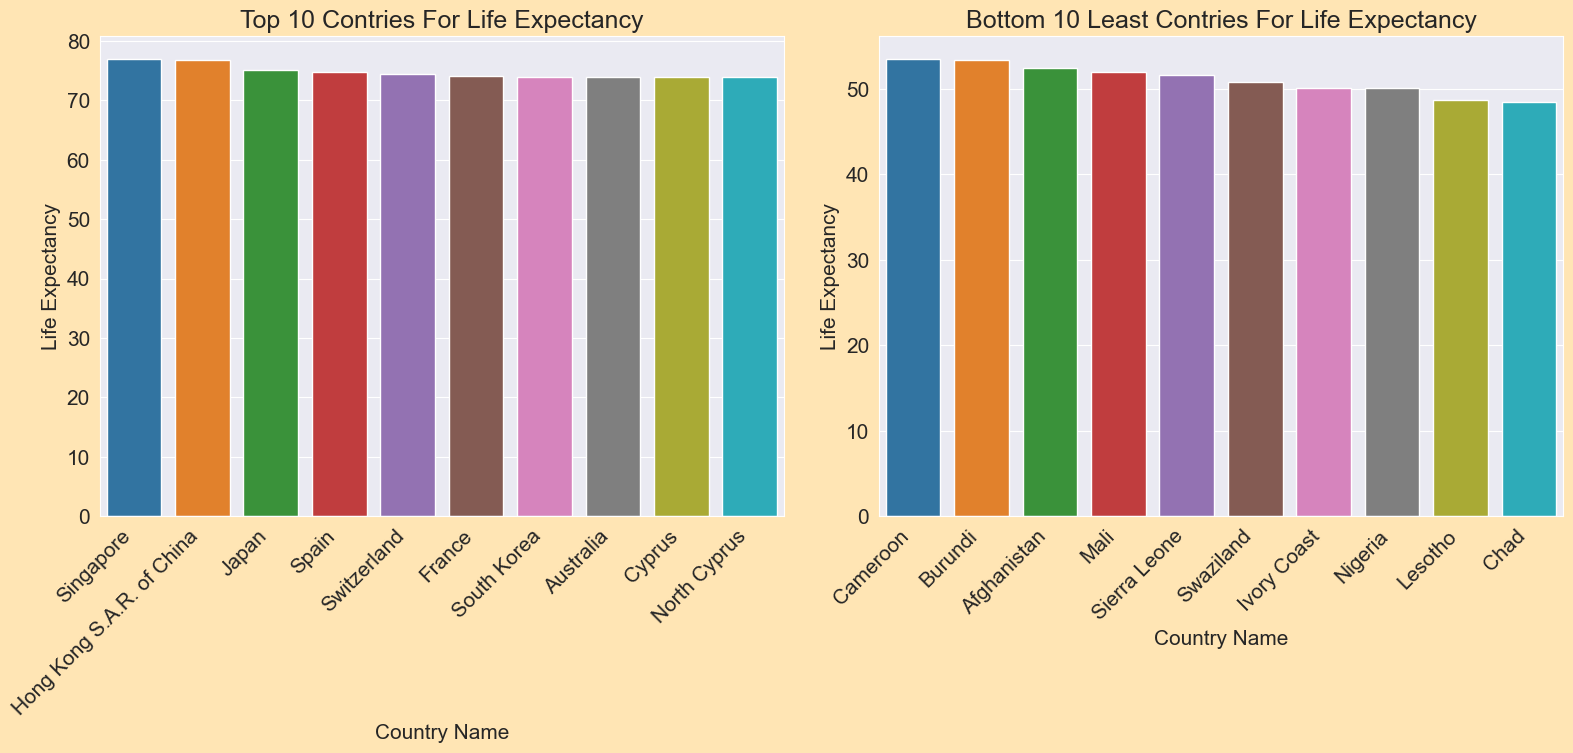

In [21]:
fig,axes = plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels = top10_life_expectancy['country_name']
axes[0].set_title('Top 10 Contries For Life Expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top10_life_expectancy['country_name'],y=top10_life_expectancy['healthy_life_expectancy'],ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')




xlabels = top10_life_expectancy['country_name']
axes[1].set_title('Bottom 10 Least Contries For Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=bottom10_life_expectancy['country_name'],y=bottom10_life_expectancy['healthy_life_expectancy'],ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')
plt.show()

## observation-
### we clearly see that singabore, hong kong of china, japan are the highest for life expectancy with 77,76,75
### and chad, lesotho, nigeria are the least  for life expectancy with 49, 48,50

In [14]:
df.head(1)

,country_name,regional_indicator,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186


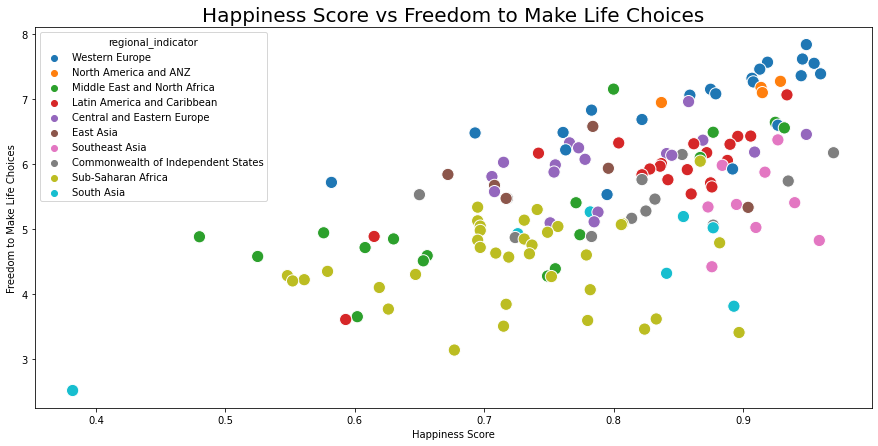

In [18]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score vs Freedom to Make Life Choices',fontsize=20)
plt.legend(df['regional_indicator'],loc='upper left',fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to Make Life Choices')
sns.scatterplot(x=df['freedom_to_make_life_choices'],y=df['happiness_score'],hue = df['regional_indicator'],s=150);

## observation-
### western europe and North America and ANZ  have highest numbers for happiness and freedom to make life choices
### south asia ,sub-saharan africa and commonth of independent states have least numbers for happiness and freedom to make life choices

In [17]:
top10_corrupted_countries = df.groupby('country_name')['perceptions_of_corruption'].mean().reset_index().sort_values(by='perceptions_of_corruption',ascending=False).head(10).round(2)
top10_corrupted_countries

,country_name,perceptions_of_corruption
30,Croatia,0.94
112,Romania,0.94
17,Bulgaria,0.93
14,Bosnia and Herzegovina,0.93
0,Afghanistan,0.92
138,Ukraine,0.92
88,Moldova,0.92
68,Kosovo,0.92
74,Lesotho,0.92
120,Slovakia,0.91


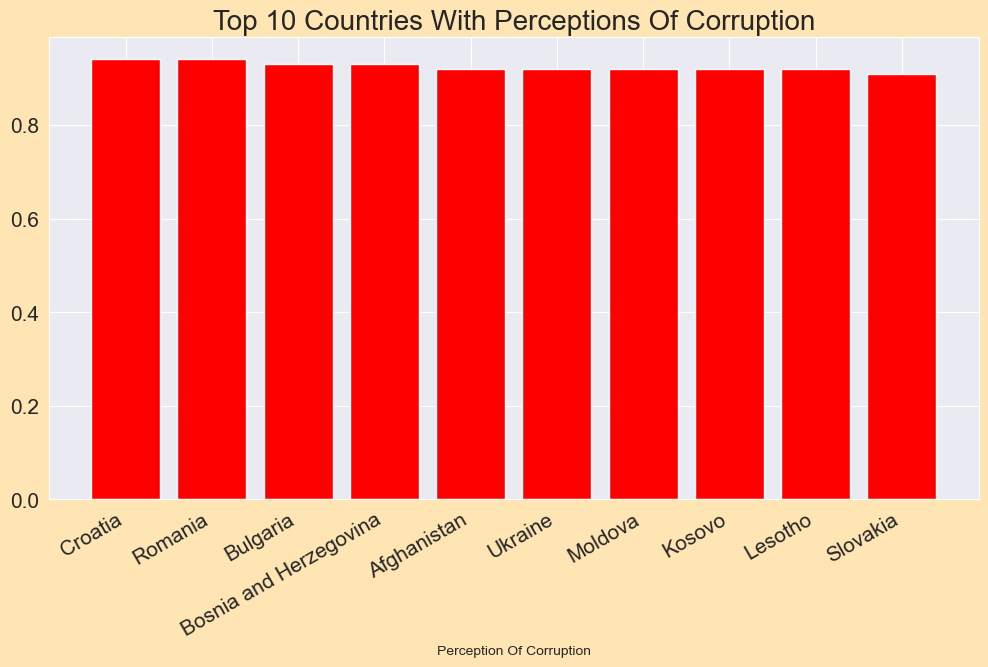

In [18]:
plt.rcParams['figure.figsize']=(12,6)
plt.title('Top 10 Countries With Perceptions Of Corruption',fontsize=20)
plt.xlabel('Country Name',fontsize=10)
plt.xlabel('Perception Of Corruption',fontsize=10)
plt.xticks(rotation=30,ha='right')
plt.bar(top10_corrupted_countries['country_name'],top10_corrupted_countries['perceptions_of_corruption'],color='Red');

## observation-
### we see that croatia , romania , bulgaria ,bosnia, afghanistan all have high avg perception of corruption 

In [37]:
bottom10_least_corrupted_countries =  df.groupby('country_name')['perceptions_of_corruption'].sum().reset_index().sort_values(by='perceptions_of_corruption',ascending=False).tail(10).round(2)
bottom10_least_corrupted_countries

,country_name,perceptions_of_corruption
59,Ireland,0.36
96,Netherlands,0.34
128,Switzerland,0.29
103,Norway,0.27
97,New Zealand,0.24
127,Sweden,0.24
40,Finland,0.19
33,Denmark,0.18
114,Rwanda,0.17
119,Singapore,0.08


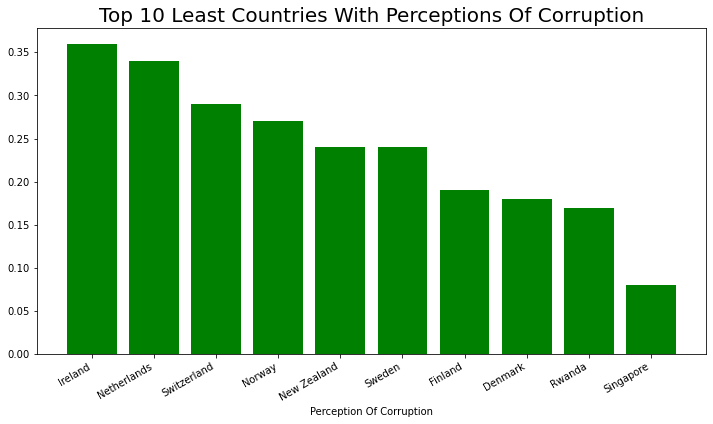

In [39]:
plt.rcParams['figure.figsize']=(12,6)
plt.title('Top 10 Least Countries With Perceptions Of Corruption',fontsize=20)
plt.xlabel('Country Name',fontsize=10)
plt.xlabel('Perception Of Corruption',fontsize=10)
plt.xticks(rotation=30,ha='right')
plt.bar(bottom10_least_corrupted_countries['country_name'],bottom10_least_corrupted_countries['perceptions_of_corruption'],color='Green');

### observation
### ireland, holland, switzerland, norway are the least countries for avg perceptions of corruption 

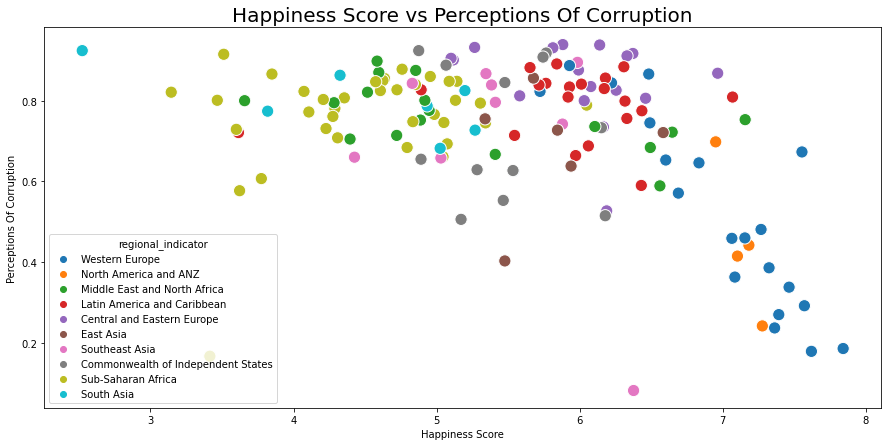

In [40]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness Score vs Perceptions Of Corruption',fontsize=20)
plt.legend(df['regional_indicator'],loc='upper left',fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('Perceptions Of Corruption')
sns.scatterplot(x=df['happiness_score'],y=df['perceptions_of_corruption'],hue = df['regional_indicator'],s=150);

### conclusion
#### 1- western europe,north america have the highest gdp per capita and happiness score,sub-saharan africa and south asia have the least numbers for gdp per capita and happiness score
#### 2- ireland, holland, switzerland, norway are the least countries for avg perceptions of corruption 
#### 3-  we clearly see that singabore, hong kong of china, japan are the highest for life expectancy with 77,76,75, and chad, lesotho, nigeria are the least  for life expectancy with 49, 48,50